In [1]:
# Import Required Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Read in white wine data
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep =';')

# Read in red wine data
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep =';')

## Step #1: Know your data.

In [2]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Describe `white`
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [5]:
# check null
red.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Step #2: Distribution Alcohol

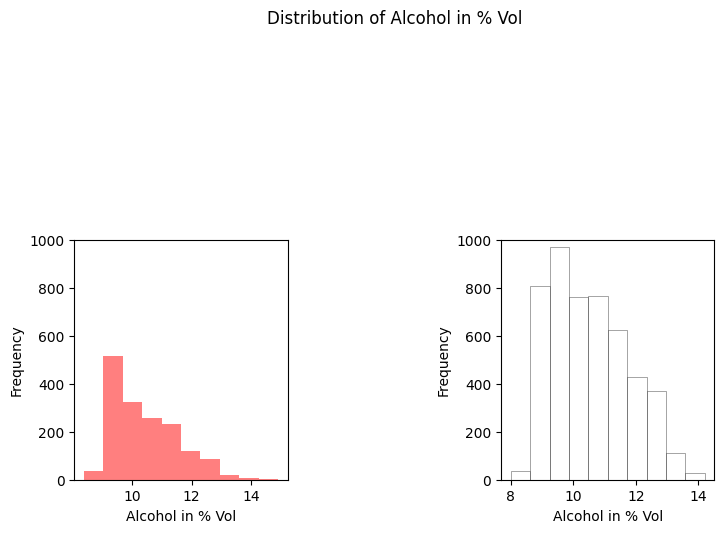

In [6]:

# Create Histogram
fig, ax = plt.subplots(1, 2)

ax[0].hist(red.alcohol, 10, facecolor ='red',
              alpha = 0.5, label ="Red wine")

ax[1].hist(white.alcohol, 10, facecolor ='white',
           ec ="black", lw = 0.5, alpha = 0.5,
           label ="White wine")

fig.subplots_adjust(left = 0, right = 1, bottom = 0,
               top = 0.5, hspace = 0.05, wspace = 1)

ax[0].set_ylim([0, 1000])
ax[0].set_xlabel("Alcohol in % Vol")
ax[0].set_ylabel("Frequency")
ax[1].set_ylim([0, 1000])
ax[1].set_xlabel("Alcohol in % Vol")
ax[1].set_ylabel("Frequency")

fig.suptitle("Distribution of Alcohol in % Vol")
plt.show()

## Step #3: Splitting

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# Add `type` column to `red` with price one
red['type'] = 1

# Add `type` column to `white` with price zero
white['type'] = 0

# Append `white` to `red`
wines = red.append(white, ignore_index = True)

X = wines.drop("type", axis=1)
y = wines.type

# Splitting the data set for training and validating
X_train, X_test, y_train, y_test = train_test_split(
           X, y, test_size = 0.34, random_state = 45)

<ipython-input-8-a98c15c49ac6>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wines = red.append(white, ignore_index = True)


In [9]:
X_train.shape

(4288, 12)

##Step #3: Structure of Network

In [10]:
import numpy as np
from typing import List
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, RegressorMixin, ClassifierMixin
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [12]:
X_train.shape

(4288, 12)

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
from sklearn.base import BaseEstimator, ClassifierMixin
from typing import List

class ANNClassifier(BaseEstimator, ClassifierMixin):
    """
    Referensi: https://stackoverflow.com/questions/72583906/is-it-possible-to-apply-sklearn-pipeline-for-deep-learning-neural-network
    """

    def __init__(
        self,
        input_dim: int = 12,
        hidden_units: List[int] = [64, 32],
        lr: float = 0.001,
        activation: str = "relu",
        loss: str = 'binary_crossentropy',
        output_activation: str = 'sigmoid',
        optimizer: str = 'Adam',
        metrics: List[str] = ['accuracy']
    ):
        self.input_dim = input_dim
        self.hidden_units = hidden_units
        self.activation = activation
        self.output_activation = output_activation
        self.loss = loss
        self.lr = lr
        self.optimizer = optimizer
        self.metrics = metrics
        self.model = None

    def create_ann_model(self):
        model = Sequential()
        model.add(Dense(self.hidden_units[0], input_dim=self.input_dim, activation=self.activation))
        for unit in self.hidden_units[1:]:
            model.add(Dense(unit, activation=self.activation))
        model.add(Dense(1, activation=self.output_activation))

        # Membungkus optimizer dengan objek tf.keras.optimizers
        optimizer = getattr(optimizers, self.optimizer)(learning_rate=self.lr)
        model.compile(optimizer=optimizer, loss=self.loss, metrics=self.metrics)
        return model

    def fit(self, X, y):
        self.model = self.create_ann_model()
        self.model.fit(X, y, epochs=10, batch_size=32, verbose=0)
        return self

    def predict(self, X):
        return (self.model.predict(X) > 0.5).astype(int).flatten()

In [47]:
ann_classifier = ANNClassifier()
summary = ann_classifier.create_ann_model()

In [27]:
summary.output_shape

(None, 1)

In [48]:
summary.summary()

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 64)                832       
                                                                 
 dense_47 (Dense)            (None, 32)                2080      
                                                                 
 dense_48 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2945 (11.50 KB)
Trainable params: 2945 (11.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Step #4: Train

In [29]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from scipy.stats import randint, uniform

In [49]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ann', ann_classifier)
])

In [31]:
scores = cross_val_score(pipeline, X_train, y_train, cv=3, scoring='accuracy')
print(f"Cross-Validation Scores: {scores}")
print(f"Mean Cross-Validation Score: {scores.mean()}")

45/45 [==============================] - 0s 2ms/step
Cross-Validation Scores: [0.9965035  0.99510147 0.99720084]
Mean Cross-Validation Score: 0.9962686019369015


In [ ]:
# pipeline.fit(X_train, y_train)
# y_pred = pipeline.predict(X_test)

## Hyperparameter Tuning (Optional)
### GridSearchCV

In [50]:
# Hyperparameter Tuning
params = {
    'ann__hidden_units': [(64, 32), (128, 64)],
    'ann__activation': ['relu', 'tanh'],
    'ann__output_activation': ['sigmoid', 'softmax'],
    'ann__lr': uniform(0.0001, 0.1)
}

# grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy')
# grid_search.fit(X_train, y_train)

# print(f"Best Parameters: {grid_search.best_params_}")
# print(f"Best Score: {grid_search.best_score_}")


In [38]:
# best_model = grid_search.best_params_
# best_model.fit(X_train, y_train)
# y_pred = best_model.predict(X_test)

### RandomSearchCV


In [32]:
from sklearn.model_selection import RandomizedSearchCV

In [51]:
random_search = RandomizedSearchCV(pipeline, params, n_iter=5, cv=3, error_score='raise')
random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)
print("Best cross-validation score:", random_search.best_score_)

45/45 [==============================] - 0s 2ms/step
Best parameters: {'ann__activation': 'tanh', 'ann__hidden_units': (128, 64), 'ann__lr': 0.006019958984721974, 'ann__output_activation': 'sigmoid'}
Best cross-validation score: 0.9958019121070206


In [54]:
best_params = {
    'activation': 'tanh',
    'hidden_units': (128, 64),
    'lr': 0.006019958984721974,
    'output_activation': 'sigmoid'
}

best_params

{'activation': 'tanh',
 'hidden_units': (128, 64),
 'lr': 0.006019958984721974,
 'output_activation': 'sigmoid'}

In [55]:
best_model = ANNClassifier(**best_params)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

70/70 [==============================] - 0s 2ms/step


## Step #5: Evaluate

In [56]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [57]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy}")

Akurasi: 0.9764599366229063


In [58]:
# Precision, Recall, dan F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

# Classification Report
report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)

Precision: 0.9623655913978495
Recall: 0.9454225352112676
F1-score: 0.9538188277087034

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1641
           1       0.96      0.95      0.95       568

    accuracy                           0.98      2209
   macro avg       0.97      0.97      0.97      2209
weighted avg       0.98      0.98      0.98      2209



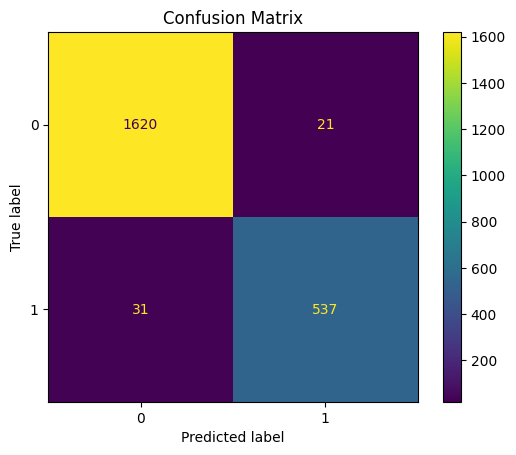

In [59]:
# Confusion Matrix
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
disp.ax_.set_title('Confusion Matrix')
plt.show()

In [64]:
# Save Load Model
import joblib

joblib.dump(best_model, 'ann_model.pkl')

['ann_model.pkl']

In [65]:
loaded_pipeline = joblib.load('ann_model.pkl')

In [66]:
X_test[:1]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2691,7.1,0.21,0.4,1.2,0.069,24.0,156.0,0.9928,3.42,0.43,10.6,6


In [67]:
y_pred = loaded_pipeline.predict(X_test[:1])
y_pred

1/1 [==============================] - 0s 58ms/step


array([0])